<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-07 21:11:55.058397


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200507,AK,374.0,23967.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,291.0,C,5/7/2020 00:00,449ecb13656500db3e19fb31dc5d0da6349b15f8,2020-05-07T20:00:00Z,10.0,NaN,24341,24341,24341,02,0.0,0.0,684.0,2.0,686.0
1,20200507,AL,8898.0,106275.0,NaN,NaN,1178.0,NaN,448.0,NaN,266.0,NaN,B,5/7/2020 00:00,16d0fc1c8d0756fc29a6ae42c8c46a5c457b6c35,2020-05-07T20:00:00Z,349.0,1178.0,115173,115173,115173,01,9.0,20.0,5340.0,317.0,5657.0
2,20200507,AR,3611.0,56384.0,NaN,69.0,462.0,NaN,NaN,14.0,93.0,2123.0,B,5/7/2020 09:43,b3e21ebbb872bb53477dc05f144a563b65c54954,2020-05-07T20:00:00Z,87.0,462.0,59995,59995,59995,05,2.0,9.0,949.0,43.0,992.0
3,20200507,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,5/3/2020 00:00,83b5c4028fb671362a616856cb1be2ce7436e639,2020-05-07T20:00:00Z,0.0,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,20200507,AZ,9945.0,101141.0,NaN,766.0,1449.0,288.0,NaN,196.0,NaN,1722.0,A+,5/7/2020 00:00,a33ab94287832e072b9ebe51f664bd905ba2c7cc,2020-05-07T20:00:00Z,450.0,1449.0,111086,111086,111086,04,24.0,19.0,19111.0,238.0,19349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609165307f5d60e495d9eaed0e0f3387c7bf8eca,2020-01-26T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3541,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8aa0b13ab29023a1508b6ab3eb78f0f5c9db331,2020-01-25T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3542,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a78947c0c03661f5387e9e6835cb9643765943a,2020-01-24T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3543,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24102d7fccb764d4f7c6ee847522451af42a7e2b,2020-01-23T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,20200507,NY,327649.0,762267.0,NaN,8665.0,71152.0,2976.0,NaN,2425.0,NaN,55547.0,B,5/7/2020 00:00,aa09a1b85d3fc400541054cb2c3d6b8448d876c7,2020-05-07T20:00:00Z,20828.0,71152.0,1089916,1089916,1089916,36,951.0,613.0,30324.0,3671.0,33995.0
93,20200506,NY,323978.0,731943.0,NaN,9179.0,70539.0,NaN,NaN,NaN,NaN,54597.0,B,5/6/2020 00:00,e8a0855be45dbf442e72628a2fce22a1d0e9575d,2020-05-06T20:00:00Z,19877.0,70539.0,1055921,1055921,1055921,36,232.0,672.0,24236.0,2786.0,27022.0
149,20200505,NY,321192.0,707707.0,NaN,9603.0,69867.0,NaN,NaN,NaN,NaN,58950.0,B,5/5/2020 00:00,29c3e10715681c8e3221108398fa8f4bb8572a6a,2020-05-05T20:00:00Z,19645.0,69867.0,1028899,1028899,1028899,36,230.0,536.0,19350.0,2239.0,21589.0
205,20200504,NY,318953.0,688357.0,NaN,9647.0,69331.0,NaN,NaN,NaN,NaN,58950.0,B,5/4/2020 00:00,ba4d074a61ad40eb9e794352cffbb05e283ba506,2020-05-04T20:00:00Z,19415.0,69331.0,1007310,1007310,1007310,36,226.0,595.0,18861.0,2538.0,21399.0
261,20200503,NY,316415.0,669496.0,NaN,9786.0,68736.0,NaN,NaN,NaN,NaN,58950.0,B,5/3/2020 00:00,8269e363c3fb0c3b89f74591b6ff550750ba4882,2020-05-03T20:00:00Z,19189.0,68736.0,985911,985911,985911,36,280.0,846.0,23402.0,3438.0,26840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d5e8dc460e38951e9c4ed83ea6116f3d1ef964e9,2020-03-08T20:00:00Z,NaN,NaN,197,197,197,36,0.0,0.0,0.0,29.0,29.0
3405,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4cc604c6ed1a38fd0eac5f9526682d5eb68a6b96,2020-03-07T21:00:00Z,NaN,NaN,404,168,168,36,0.0,0.0,0.0,43.0,43.0
3445,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a4269189c0f37537baee7e4fd80167aa7237fa7e,2020-03-06T21:00:00Z,NaN,NaN,361,125,125,36,0.0,0.0,16.0,11.0,27.0
3472,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f5fa9d458bf8fb40664458e2710437c5e5a89aaf,2020-03-05T21:00:00Z,NaN,NaN,122,98,98,36,0.0,0.0,28.0,16.0,44.0


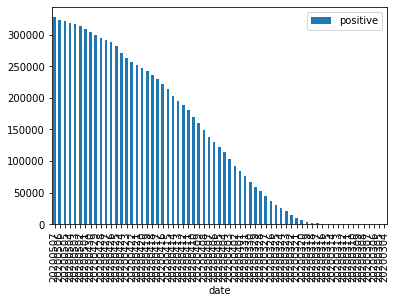

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')